In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import arviz as az

In [3]:
az.style.use('arviz-darkgrid')

In [2]:
μ = 0.
σ = 1.
X = stats.norm(μ, σ)
x = X.rvs(1500)
x[0:50]

array([-0.91734439, -0.07185317,  0.49885245,  0.63257104,  1.33679528,
        0.81766139,  1.32805716, -0.74304511, -0.79417295, -0.19194975,
        1.22302879,  1.28342824,  1.09011087, -0.98919733,  0.69940602,
       -0.31586147, -1.33324556, -0.9804655 , -1.32251269, -0.39588049,
        0.66446519, -1.14108154,  0.09287166,  1.54340736, -0.12363776,
       -0.62981416, -0.45777299,  0.29117133, -1.73213383,  0.85267237,
        2.24149759,  0.20086385, -1.0415386 , -0.15976496,  0.16120927,
        0.80871854, -0.38624405, -0.58355271,  0.8685556 , -0.06863641,
        0.02360181,  0.81003736,  0.98102034, -0.28976226,  0.57787014,
       -0.62601204, -1.65102725, -0.47091913, -1.6353789 , -1.64636917])

In [8]:
x.mean()

-0.01656603980940575

[]

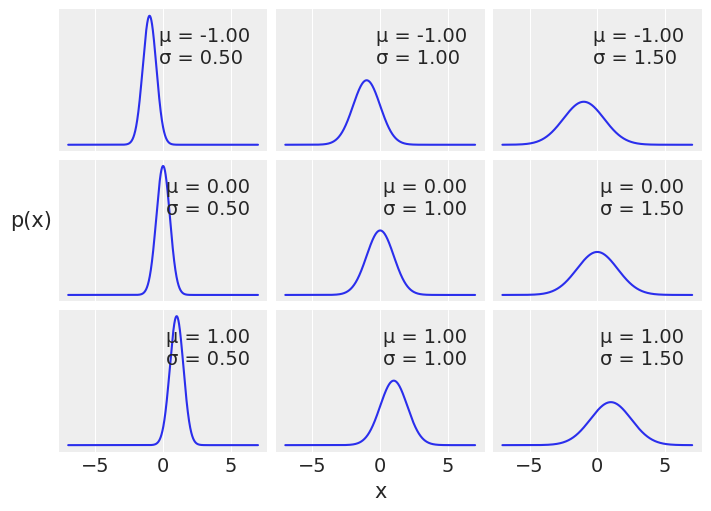

In [15]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 2000)

_, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True, sharey=True,
                     figsize=(7, 5), constrained_layout=True)

for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = stats.norm(mu, sd).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot([], label="μ = {:3.2f}\nσ = {:3.2f}".format(mu, sd), alpha=0)
        ax[i,j].legend(loc=1)
ax[2,1].set_xlabel('x')
ax[1,0].set_ylabel('p(x)', rotation=0, labelpad=20)
ax[1,0].set_yticks([])
# plt.savefig('B11197_01_01.png', dpi=300);

In [5]:
data = pd.read_csv('../data/co2_cba.csv', delimiter=',')
data
# plt.savefig('B11197_01_02.png', dpi=300)

,site,year,month,value
0,CBA,1978,10,333.93
1,CBA,1978,11,336.51
2,CBA,1978,12,338.28
3,CBA,1979,1,340.01
4,CBA,1979,2,340.83
...,...,...,...,...
438,CBA,2020,8,402.81
439,CBA,2020,9,407.26
440,CBA,2020,10,414.03
441,CBA,2020,11,417.53


Text(0, 0.5, '$CO_2$ (ppmv)')

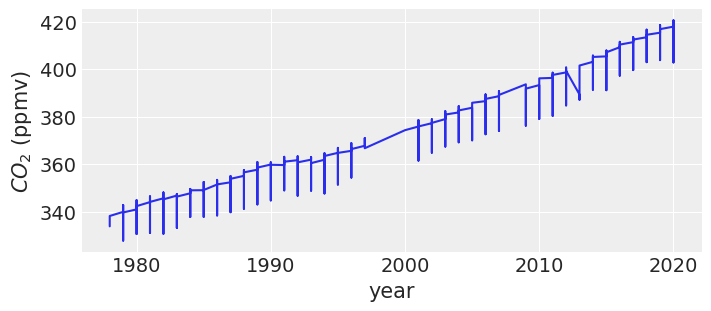

In [8]:
plt.subplots(sharex=True, sharey=True, figsize=(7, 3), constrained_layout=True)
plt.plot(data.year, data.value)
plt.xlabel('year')
plt.ylabel('$CO_2$ (ppmv)')

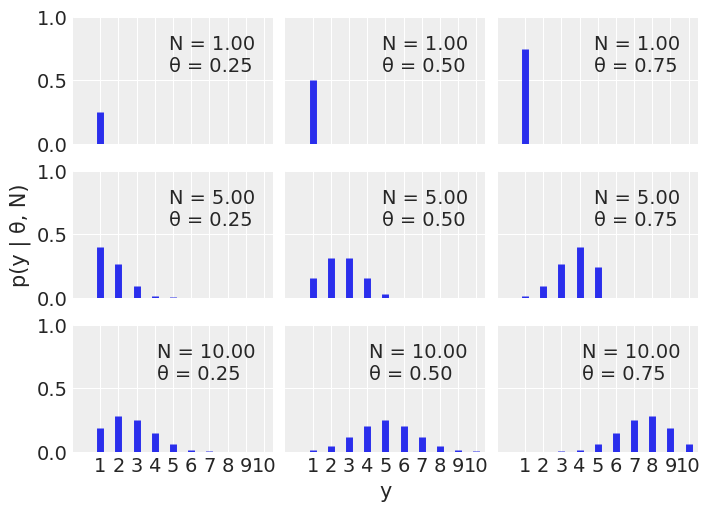

In [16]:
n_params = [1, 5, 10]  # Number of trials
p_params = [0.25, 0.5, 0.75]  # Probability of success

x = np.arange(1, max(n_params)+1)
f,ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True,
                    figsize=(7, 5), constrained_layout=True)

for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]
        y = stats.binom(n=n, p=p).pmf(x) # -- pmf : probability mass function

        ax[i,j].vlines(x, 0, y, colors='C0', lw=5)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="N = {:3.2f}\nθ = {:3.2f}".format(n,p), alpha=0)
        ax[i,j].legend()
        ax[2,1].set_xlabel('y')
        ax[1,0].set_ylabel('p(y | θ, N)')
        ax[0,0].set_xticks(x)
# plt.savefig('B11197_01_03.png', dpi=300)

Text(0.0007, 0.5, 'p(θ)')

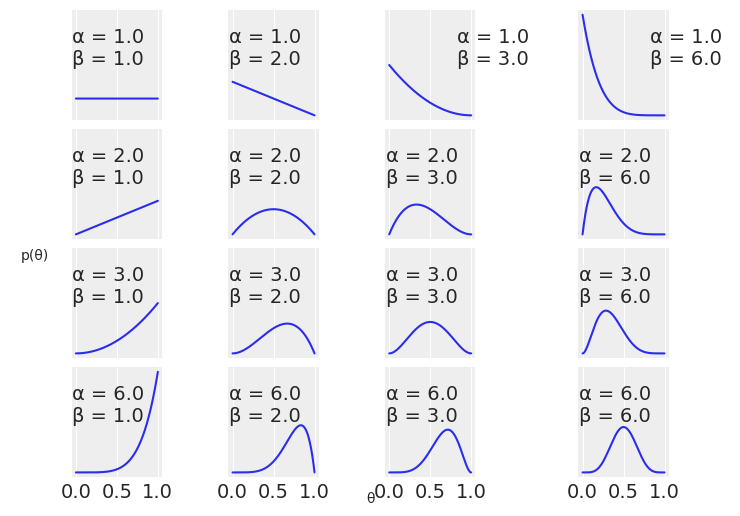

In [30]:
params = [1, 2, 3,6]
x = np.linspace(0, 1, 10000)
f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True, figsize=(7,5), constrained_layout=True)
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        # One of them is that the beta distribution is restricted to be between 0 and 1, in the
#same way our parameter is
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="α = {:2.1f}\nβ = {:2.1f}".format(a, b), alpha=0)
        ax[i,j].legend()
ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
f.text(0.5, 0.005, 'θ', ha='center')
f.text(0.0007, 0.5, 'p(θ)', va='center', rotation=0)
# plt.title('Beta distribution')
# plt.savefig('B11197_01_04.png', dpi=300)

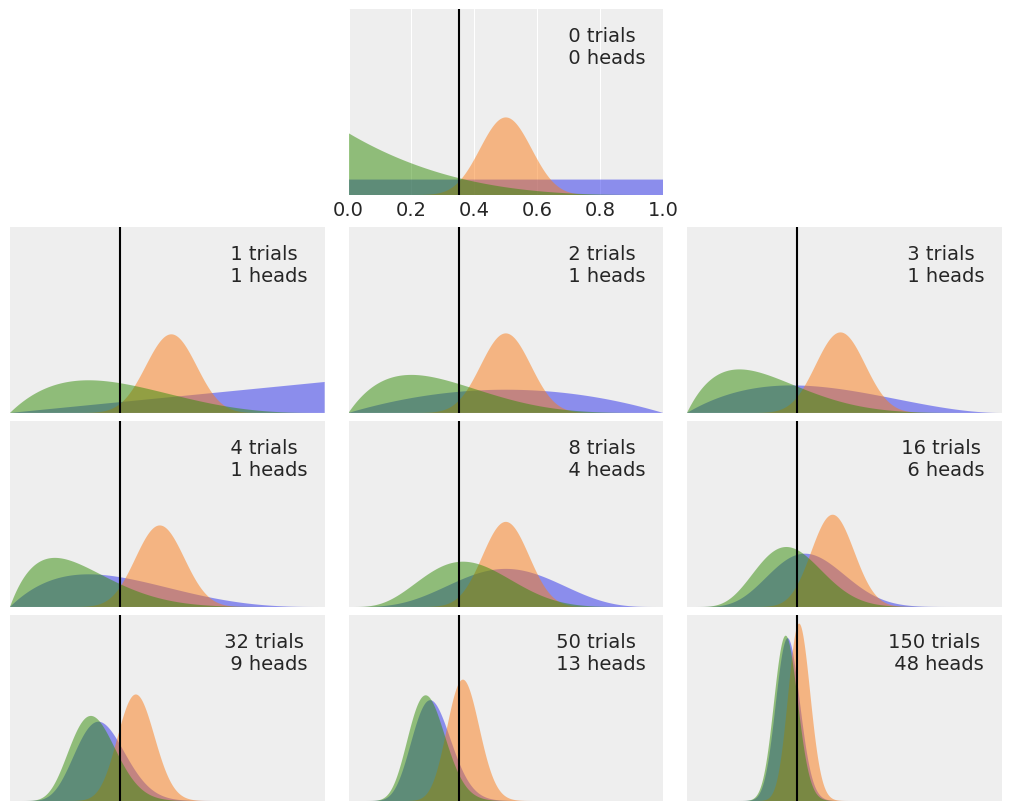

In [60]:
plt.figure(figsize=(10, 8))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]*1000
theta_real = 0.35
beta_params = [(1, 1), (20, 20), (1, 4)]
dist = stats.beta
x = np.linspace(0, 1, 20000)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N -y) # esta es la funcion
        plt.fill_between(x,0,p_theta_given_y, alpha=0.5)

    plt.axvline(theta_real, ymax=1.3, color='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
# plt.savefig('B11197_01_05.png', dpi=300)

* The uniform (blue) prior. This represent all the possible values for the bias being equally probable a priori.

* The Gaussian-like (orange) prior is centered and concentrated around 0.5, so this prior is compatible with information indicating that the coin has more or less about the same chance of landing heads or tails. We could also say this prior is compatible with the belief that most coins are fair. While belief is commonly used in Bayesian discussions, we think is better to talk about models and parameters that are informed by data.
* The skewed (green) prior puts the most weight on a tail-biased outcome.

<AxesSubplot:title={'center':'θ'}>

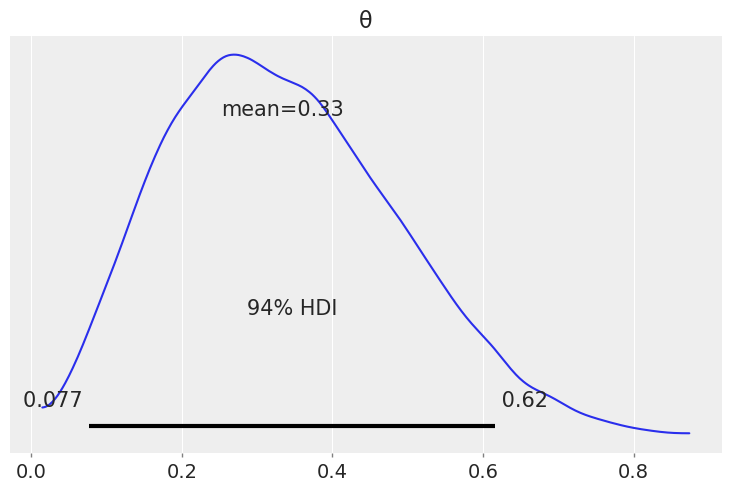

In [65]:
np.random.seed(1)
az.plot_posterior({'θ':stats.beta.rvs(3, 6, size=10000)})
# plt.savefig('B11197_01_07.png', dpi=300)

<img src="B11197_01_08.png" width="500">